In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
df = pd.read_csv("../data/Breast_Cancer.csv")

In [274]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [276]:
df.shape

(4024, 16)

In [277]:
df['Grade'].value_counts()

Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

In [278]:
df['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [279]:
df['Tumor Size'].value_counts()

Tumor Size
15    271
25    268
30    228
20    211
35    161
     ... 
86      1
64      1
96      1
79      1
67      1
Name: count, Length: 110, dtype: int64

In [280]:
df['Age'].mean()

np.float64(53.97216699801193)

In [281]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [282]:
df['A Stage'].unique().tolist()

['Regional', 'Distant']

In [283]:
# Are there any missing values in the dataset?
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [284]:
df.duplicated().sum()


np.int64(1)

In [285]:
# dropping unnecessary columns
df = df.drop(columns=['A Stage', 'Reginol Node Positive', 'Regional Node Examined', 'Race', 'Marital Status'])

In [286]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,4,Positive,Positive,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,35,Positive,Positive,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,63,Positive,Positive,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,18,Positive,Positive,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,41,Positive,Positive,50,Alive


C:\Users\shyle\AppData\Local\Temp\ipykernel_18012\3418888237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_age_groups = df.groupby('age_group')['Status'].count().reset_index()


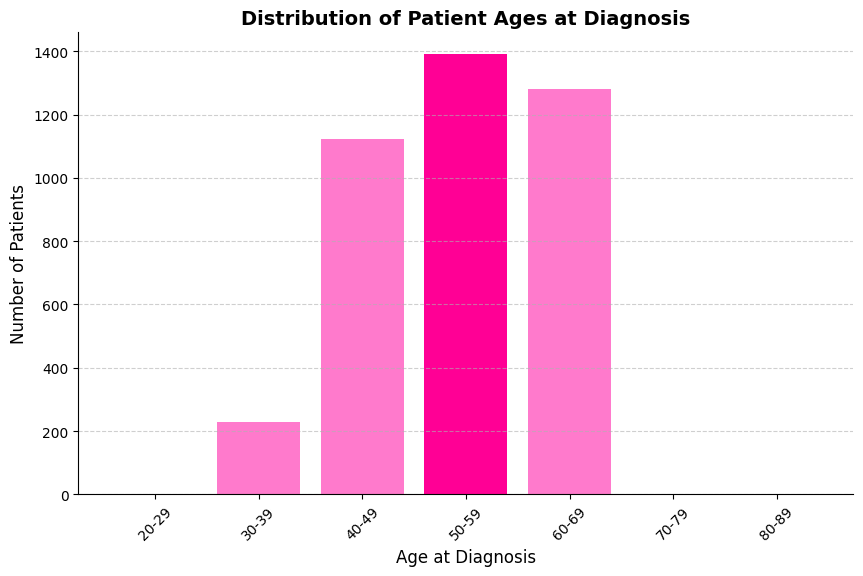

In [294]:
# What is the range of patient ages at diagnosis?
#bar plot

bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
avg_age_groups = df.groupby('age_group')['Status'].count().reset_index()

age_counts = df['age_group'].value_counts().sort_index()
max_count = age_counts.max()

plt.figure(figsize=(10,6))

colors = ["#ff0095" if count == max_count else "#ff7acc" for count in age_counts]

plt.bar(avg_age_groups['age_group'], avg_age_groups['Status'], color=colors)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Distribution of Patient Ages at Diagnosis', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()







# Findings and Observations
This bar graph shows the distribution of patients across different age groups. The largest age group is patients in their 50s, while the smallest age group is those in their 30s. In addition,there is a significant increase in the number of patients between the 30s and 40s age groups.

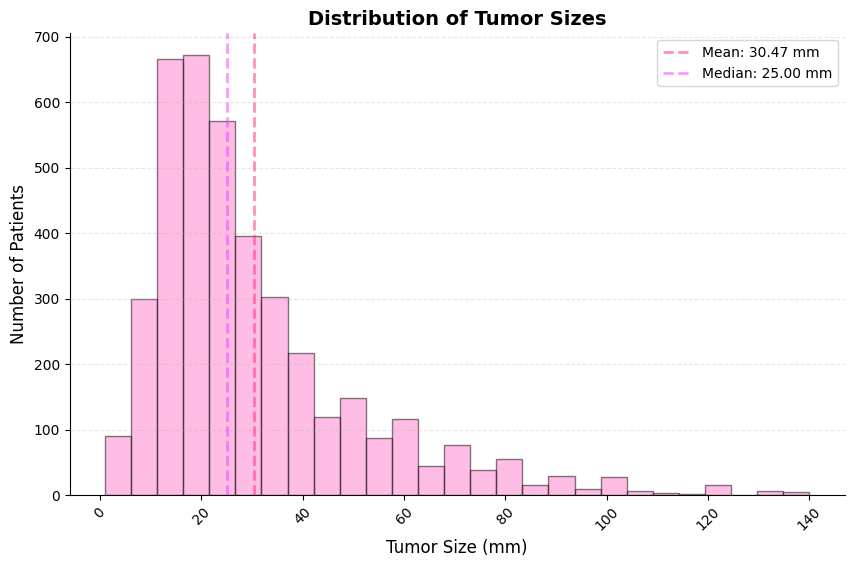

In [288]:
# How does tumor size relate to patient survival months?
#histogram

mean = df['Tumor Size'].mean()
median = df['Tumor Size'].median()



plt.figure(figsize=(10,6))
plt.hist(df['Tumor Size'], bins=27, color="#ff7bcc", edgecolor='black', alpha=0.5)

plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Distribution of Tumor Sizes', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)

plt.axvline(mean, color="#ff237f", linestyle='dashed', linewidth=2, alpha=0.5, label=f'Mean: {mean:.2f} mm')
plt.axvline(median, color="#f835ff", linestyle='dashed', linewidth=2, alpha=0.5, label=f'Median: {median:.2f} mm')
plt.legend()


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Findings and Observations 
This histogram shows the distribution of tumor sizes among patients. The number of patients increases quickly for tumor sizes between 0 and 20 mm, after which the distrobution gradually decreases. The mean and median tumor sizes are indicated on the graph, located at 30.47 mm and 25 mm.

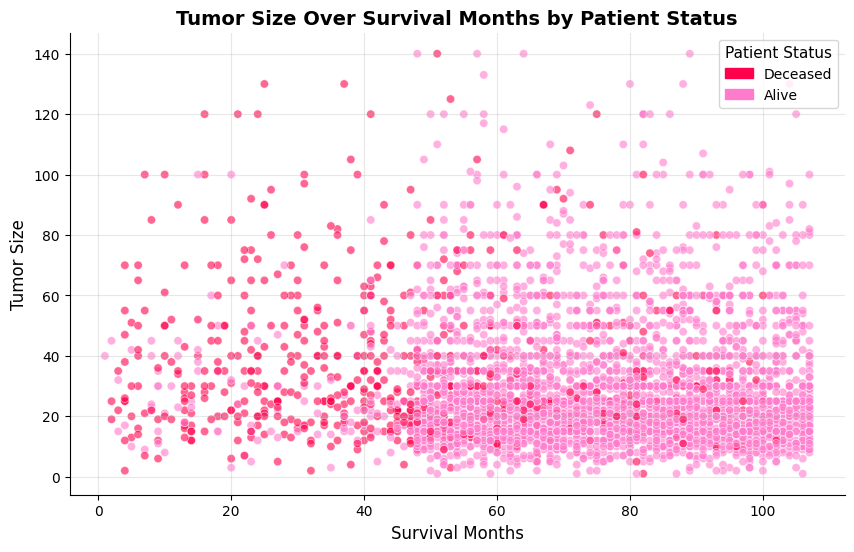

In [ ]:
# What is the distribution of patient survival months by tumor size?
#scarter plot

plt.figure(figsize=(10,6))

deased_patients = df[df['Status'] == 'Dead']

colors = ["#ff004c" if status == 'Dead' else '#ff7bcc' for status in df['Status']]

plt.scatter(df['Survival Months'], 
            df['Tumor Size'], alpha=0.6,
              edgecolor='w',
                linewidth=0.5, 
                color=colors)
         
           
plt.xlabel('Survival Months', fontsize=12)
plt.ylabel('Tumor Size', fontsize=12)
plt.title('Tumor Size Over Survival Months by Patient Status', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

deceased_dot = mpatches.Patch(color="#ff004c", label='Deceased')
alive_dot = mpatches.Patch(color="#ff7bcc", label='Alive')
plt.legend(handles=[deceased_dot, alive_dot],
           loc='upper right', fontsize=10, title='Patient Status', title_fontsize=11)
plt.show()







# Findings and Observations
This scatter plot shows tumor sizes and survival months for patients, catergorized by their status(Deaceased or Alive). Patients with smaller tumors tend to survive longer, with Alive patients clustering in the later survival months. Larger tumors are more common among Deaceased patients, mostly within the first 40 months.
